In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [40]:
df = pd.read_csv(r"C:\Users\12489\Documents\Data\bigmart_train.csv")

df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.shape

(8523, 12)

----------

In [42]:
df['OutletAge'] = 2022-df['EstablishmentYear']

------------

In [43]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
OutletAge               0
dtype: int64

In [44]:
df['Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Weight, dtype: float64

In [45]:
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [46]:
df['OutletSize'].value_counts()

Medium    2793
Small     2388
High       932
Name: OutletSize, dtype: int64

In [47]:
df['OutletSize']=df['OutletSize'].fillna(df['OutletSize'].mode()[0])

In [48]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
OutletAge            0
dtype: int64

---------------

<AxesSubplot:>

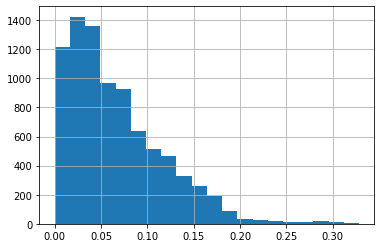

In [49]:
df['ProductVisibility'].hist(bins=20)

In [50]:
Q1 = df['ProductVisibility'].quantile(0.25)
Q3 = df['ProductVisibility'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df.query('(@Q1 - 1.5*@IQR) <= ProductVisibility <= (@Q3 + 1.5*@IQR)')

filtered_df.shape, df.shape

((8379, 13), (8523, 13))

In [51]:
df = filtered_df

In [52]:
df['ProductVisibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: ProductVisibility, dtype: float64

In [53]:
df['VisibilityBins'] = pd.cut(df['ProductVisibility'], [0.0, 0.065, 0.13, 0.2], labels=['Low', 'Visible', 'Highly Visible'])

df['VisibilityBins'].unique()

['Low', NaN, 'Visible', 'Highly Visible']
Categories (3, object): ['Low' < 'Visible' < 'Highly Visible']

In [54]:
df['VisibilityBins'].value_counts()

Low               4403
Visible           2557
Highly Visible     893
Name: VisibilityBins, dtype: int64

In [55]:
df['VisibilityBins'] = df['VisibilityBins'].fillna(df['VisibilityBins'].mode()[0])

df['VisibilityBins'].unique()

['Low', 'Visible', 'Highly Visible']
Categories (3, object): ['Low' < 'Visible' < 'Highly Visible']

In [56]:
df['VisibilityBins'].value_counts()

Low               4929
Visible           2557
Highly Visible     893
Name: VisibilityBins, dtype: int64

-----------------------

In [57]:
df['FatContent'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: FatContent, dtype: int64

In [58]:
df['FatContent'] = df['FatContent'].replace(['Low Fat', 'LF'], 'low fat')
df['FatContent'] = df['FatContent'].replace(['Regular'], 'reg')

df['FatContent'].value_counts()

low fat    5432
reg        2947
Name: FatContent, dtype: int64

--------------

In [59]:
le = LabelEncoder()

df['FatContent'] = le.fit_transform(df['FatContent'])
df['VisibilityBins'] = le.fit_transform(df['VisibilityBins'])
df['OutletSize'] = le.fit_transform(df['OutletSize'])

In [60]:
df['OutletType'].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64

In [61]:
df['OutletType'] = le.fit_transform(df['OutletType'])

dummy = pd.get_dummies(df['OutletType'], prefix='OutletType')

df = pd.concat([df, dummy], axis=1)

df.dtypes

ProductID             object
Weight               float64
FatContent             int32
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize             int32
LocationType          object
OutletType             int32
OutletSales          float64
OutletAge              int64
VisibilityBins         int32
OutletType_0           uint8
OutletType_1           uint8
OutletType_2           uint8
OutletType_3           uint8
dtype: object

----------------

In [62]:
df = df.drop(['ProductID', 'ProductType', 'OutletID', 'LocationType', 'EstablishmentYear'], axis=1)

In [63]:
df.dtypes

Weight               float64
FatContent             int32
ProductVisibility    float64
MRP                  float64
OutletSize             int32
OutletType             int32
OutletSales          float64
OutletAge              int64
VisibilityBins         int32
OutletType_0           uint8
OutletType_1           uint8
OutletType_2           uint8
OutletType_3           uint8
dtype: object

----------------------


In [64]:
X = df.drop("OutletSales", axis=1)
y = df.OutletSales

-----------------

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [66]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
print(linreg.coef_)
linreg.intercept_

[   3.33950266   27.40766327 -196.53350121   15.96615569   10.01035445
  826.08040115   -2.45322307   17.65962655 -514.94450221  626.60255657
 -534.45200765  422.79395329]


-1399.6791231978323

In [67]:
predictions = linreg.predict(X_test)

sqrt(mean_squared_error(y_test, predictions))

1118.3991576394635

-------------

In [68]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.001)
ridgereg.fit(X_train, y_train)

sqrt(mean_squared_error(y_train, ridgereg.predict(X_train)))

1139.533212477424

In [69]:
sqrt(mean_squared_error(y_test, ridgereg.predict(X_test)))

1118.3991601512294

In [70]:
# r**2 value

ridgereg.score(X_test, y_test)

0.5486276384240361

-------------

In [71]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train, y_train)

sqrt(mean_squared_error(y_train, lassoreg.predict(X_train)))

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.381e+08, tolerance: 1.732e+06
  model = cd_fast.enet_coordinate_descent(


1139.5332127009722

In [72]:
sqrt(mean_squared_error(y_test, lassoreg.predict(X_test)))

1118.3994642330604

In [73]:
# r**2 value

lassoreg.score(X_test, y_test)

0.5486273929765111

-----------

In [74]:
from sklearn.linear_model import ElasticNet

enreg = ElasticNet(alpha=0.001)
enreg.fit(X_train, y_train)

sqrt(mean_squared_error(y_train, enreg.predict(X_train)))

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+09, tolerance: 1.732e+06
  model = cd_fast.enet_coordinate_descent(


1139.5353691439525

In [75]:
sqrt(mean_squared_error(y_test, enreg.predict(X_test)))

1118.4020621141797

In [76]:
# r**2 value

enreg.score(X_test, y_test)

0.5486252960267664